In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [27]:
df = pd.concat([pd.read_csv('risk.csv', index_col=0), pd.read_csv('risk_1.csv', index_col=0)])

In [79]:
def plot_var(df, var, label):
    fig, axes = plt.subplots(2, 2, figsize=(14, 7), sharey=True)

    axes_flat = [a for ab in axes for a in ab]
    
    min_v = df[var].min()
    max_v = df[var].max()
    num_i = len(df[df.iteration == 0])
    bins = np.arange(min_v-1, max_v+1, 5)
    if len(bins) < 3:
        bins = [-1.5, -0.5, 0.5, 1.5]
    print bins

    ax = axes_flat[0]
    dummy = pd.DataFrame([random.uniform(min_v, max_v) for i in range(num_i)])
    dummy.hist(ax=ax, bins=bins)
    ax.set_title('iteration 0')
    ax.set_ylabel('number of players')

    for n, i in enumerate([1, 10, 40]):
        ax = axes_flat[n+1]
        df[df.iteration == i][var].hist(ax=ax, bins=bins)
        
        if n == 1:
            ax.set_ylabel('number of players')
        if n > 0:
            ax.set_xlabel(label)
        ax.set_title('iteration {i}'.format(i=i))
    plt.tight_layout()

[-25.99 -20.99 -15.99 -10.99  -5.99  -0.99   4.01   9.01  14.01  19.01
  24.01]


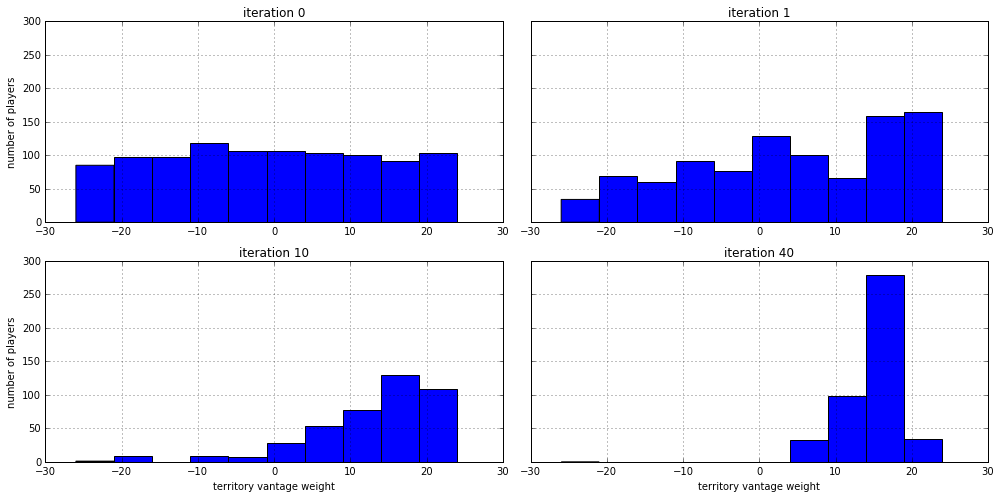

In [80]:
plot_var(df, 're_tvantage_wgt', 'territory vantage weight')

[-25.92 -20.92 -15.92 -10.92  -5.92  -0.92   4.08   9.08  14.08  19.08
  24.08]


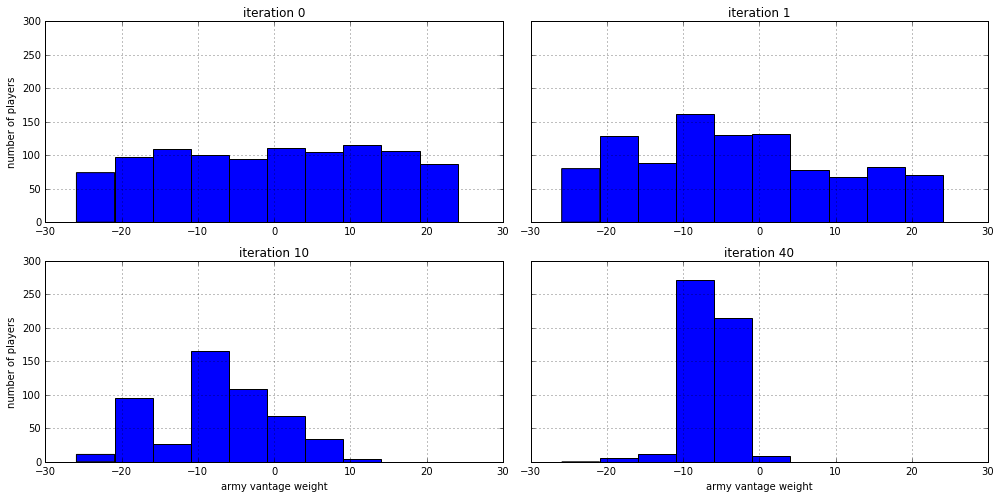

In [83]:
plot_var(df, 're_avantage_wgt', 'army vantage weight')

[-26. -21. -16. -11.  -6.  -1.   4.   9.  14.  19.  24.]


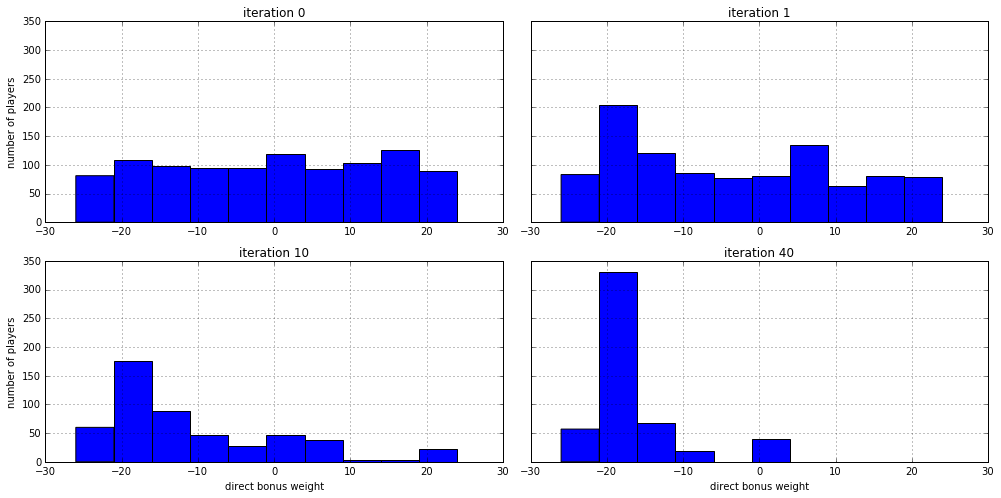

In [86]:
plot_var(df, 're_dbonus_wgt', 'direct bonus weight')

[-1.5, -0.5, 0.5, 1.5]


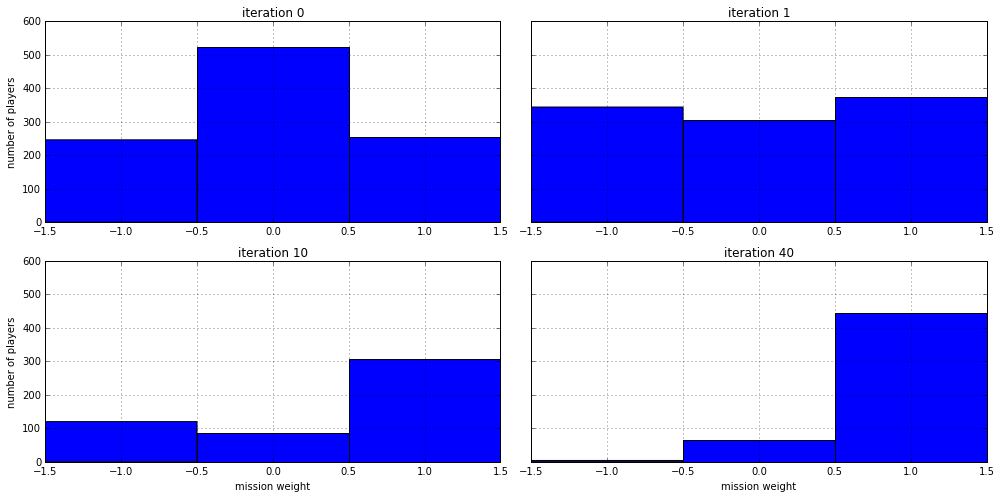

In [81]:
plot_var(df, 're_mission_wgt', 'mission weight')

In [66]:
df.columns

Index([u'att_bonus_wgt', u'att_chance_wgt', u'att_conqc_wgt', u'att_cutoff',
       u'att_cutoff_win', u'att_mission_wgt', u'att_narmies_wgt',
       u'ft_avantage_wgt', u'ft_bonus_wgt', u'ft_min_wgt', u'ft_mission_wgt',
       u'ft_narmies_wgt', u'ft_tvantage_wgt', u'mis_base_wgt', u'mis_cont_wgt',
       u'mis_extr_wgt', u'mis_play_wgt', u'mis_terr_wgt', u're_avantage_wgt',
       u're_dbonus_wgt', u're_ibonus_wgt', u're_mission_wgt',
       u're_tvantage_wgt', u'turn_in_cutoff', u'iteration'],
      dtype='object')

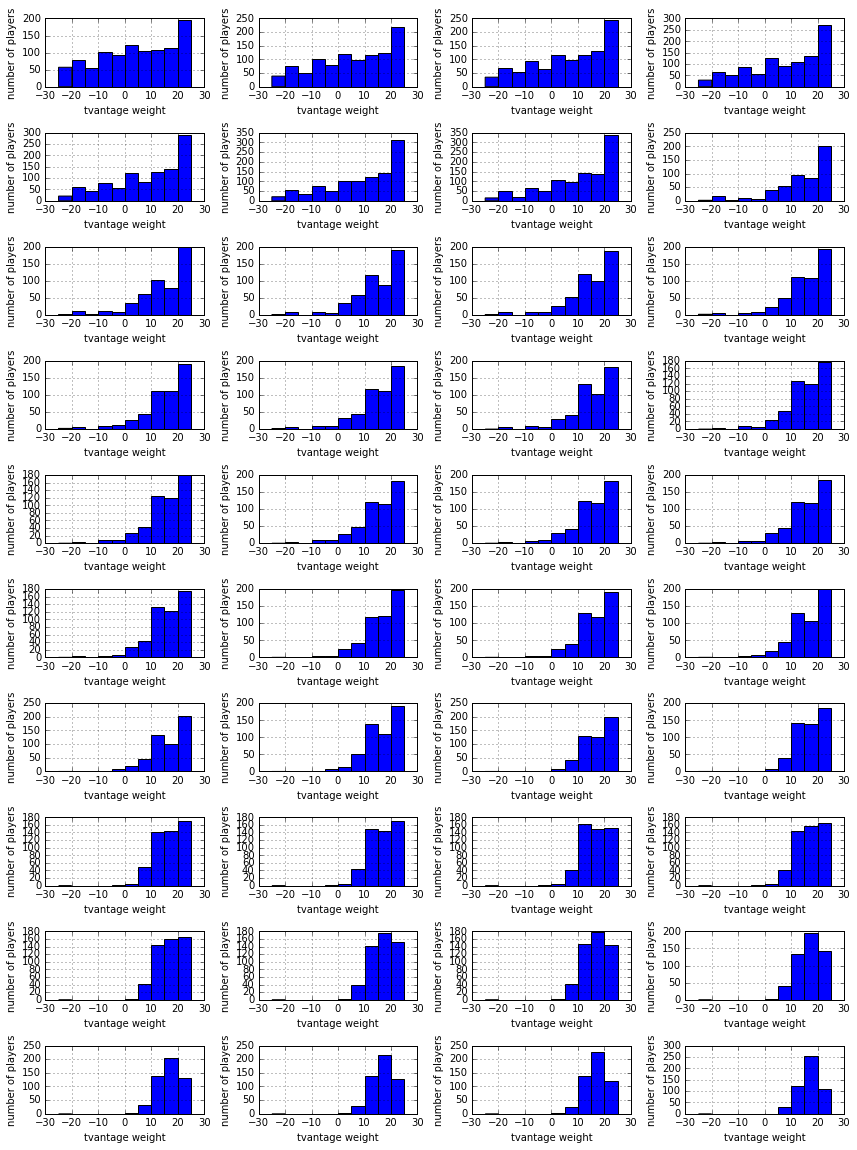

In [29]:
fig, axes = plt.subplots(10, 4, figsize=(12, 16))
for i in range(4):
    for j in range(10):
        x = 4*j + i
        ax = axes[j][i]
        df[df.iteration == i]['re_tvantage_wgt'].hist(ax=ax, bins=np.arange(-25, 30, 5))
        ax.set_xlabel('tvantage weight')
        ax.set_ylabel('number of players')
plt.tight_layout()